In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Importing and Reading Combined Data

In [2]:
df = pd.read_csv('combined.csv')
df

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years
0,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,62
1,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2015-12,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,10 TO 12,60.0,Improved,1986,275000.0,69,62
2,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2016-05,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,69.0,Improved,1986,310000.0,68,62
3,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2016-06,ANG MO KIO,2 ROOM,174,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,253000.0,68,62
4,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2016-11,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,290000.0,68,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218395,1.353327,103.739336,460C,BUKIT BATOK WEST AVENUE 9,653460,460C BT BATOK WEST AVE 9,14687.959399,1233.561855,2024-05,BUKIT BATOK,2 ROOM,460C,BT BATOK WEST AVE 9,16 TO 18,48.0,2-room,2020,350000.0,95 years 01 month,96
218396,1.341003,103.742339,240A,JURONG EAST AVENUE 1,601240,240A JURONG EAST AVE 1,13718.003504,852.608105,2024-05,JURONG EAST,3 ROOM,240A,JURONG EAST AVE 1,10 TO 12,68.0,Model A,2020,520000.0,95 years 01 month,96
218397,1.444980,103.830519,117A,CANBERRA CRESCENT,751117,117A CANBERRA CRES,18059.581318,229.185526,2024-05,SEMBAWANG,2 ROOM,117A,CANBERRA CRES,04 TO 06,47.0,Model A,2020,365000.0,95 years,96
218398,1.353570,103.740215,460D,BUKIT BATOK WEST AVENUE 9,654460,460D BT BATOK WEST AVE 9,14619.432476,1155.341075,2024-06,BUKIT BATOK,4 ROOM,460D,BT BATOK WEST AVE 9,04 TO 06,93.0,Model A,2020,635000.0,95 years,96


In [26]:
df['storey_range'].unique()

array(['07 TO 09', '10 TO 12', '04 TO 06', '01 TO 03', '13 TO 15',
       '22 TO 24', '16 TO 18', '19 TO 21', '25 TO 27', '28 TO 30',
       '34 TO 36', '46 TO 48', '37 TO 39', '40 TO 42', '31 TO 33',
       '49 TO 51', '43 TO 45'], dtype=object)

In [3]:
df.dtypes

latitude               float64
longitude              float64
blk_no                  object
road_name               object
postal_code              int64
address                 object
cbd_dist               float64
min_dist_mrt           float64
month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
lease_remain_years       int64
dtype: object

In [4]:
df.isnull().sum()

latitude               0
longitude              0
blk_no                 0
road_name              0
postal_code            0
address                0
cbd_dist               0
min_dist_mrt           0
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
lease_remain_years     0
dtype: int64

# Minor Data Preprocessing for Combined Data

In [5]:
import statistics

def get_median(x):
    split_list = x.split(' TO ')
    float_list = [float(i) for i in split_list]
    median = statistics.median(float_list)
    return median

df['storey_median'] = df['storey_range'].apply(lambda x: get_median(x))
df

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,...,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years,storey_median
0,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2015-01,ANG MO KIO,...,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,62,8.0
1,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2015-12,ANG MO KIO,...,174,ANG MO KIO AVE 4,10 TO 12,60.0,Improved,1986,275000.0,69,62,11.0
2,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2016-05,ANG MO KIO,...,174,ANG MO KIO AVE 4,04 TO 06,69.0,Improved,1986,310000.0,68,62,5.0
3,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2016-06,ANG MO KIO,...,174,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,253000.0,68,62,8.0
4,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2016-11,ANG MO KIO,...,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,290000.0,68,62,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218395,1.353327,103.739336,460C,BUKIT BATOK WEST AVENUE 9,653460,460C BT BATOK WEST AVE 9,14687.959399,1233.561855,2024-05,BUKIT BATOK,...,460C,BT BATOK WEST AVE 9,16 TO 18,48.0,2-room,2020,350000.0,95 years 01 month,96,17.0
218396,1.341003,103.742339,240A,JURONG EAST AVENUE 1,601240,240A JURONG EAST AVE 1,13718.003504,852.608105,2024-05,JURONG EAST,...,240A,JURONG EAST AVE 1,10 TO 12,68.0,Model A,2020,520000.0,95 years 01 month,96,11.0
218397,1.444980,103.830519,117A,CANBERRA CRESCENT,751117,117A CANBERRA CRES,18059.581318,229.185526,2024-05,SEMBAWANG,...,117A,CANBERRA CRES,04 TO 06,47.0,Model A,2020,365000.0,95 years,96,5.0
218398,1.353570,103.740215,460D,BUKIT BATOK WEST AVENUE 9,654460,460D BT BATOK WEST AVE 9,14619.432476,1155.341075,2024-06,BUKIT BATOK,...,460D,BT BATOK WEST AVE 9,04 TO 06,93.0,Model A,2020,635000.0,95 years,96,5.0


In [6]:
scope_df = df[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']]
scope_df

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,10296.855747,1098.780832,60.0,62,8.0,255000.0
1,10296.855747,1098.780832,60.0,62,11.0,275000.0
2,10296.855747,1098.780832,69.0,62,5.0,310000.0
3,10296.855747,1098.780832,45.0,62,8.0,253000.0
4,10296.855747,1098.780832,61.0,62,5.0,290000.0
...,...,...,...,...,...,...
218395,14687.959399,1233.561855,48.0,96,17.0,350000.0
218396,13718.003504,852.608105,68.0,96,11.0,520000.0
218397,18059.581318,229.185526,47.0,96,5.0,365000.0
218398,14619.432476,1155.341075,93.0,96,5.0,635000.0


In [7]:
scope_df = scope_df.drop_duplicates()
scope_df

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,10296.855747,1098.780832,60.0,62,8.0,255000.0
1,10296.855747,1098.780832,60.0,62,11.0,275000.0
2,10296.855747,1098.780832,69.0,62,5.0,310000.0
3,10296.855747,1098.780832,45.0,62,8.0,253000.0
4,10296.855747,1098.780832,61.0,62,5.0,290000.0
...,...,...,...,...,...,...
218395,14687.959399,1233.561855,48.0,96,17.0,350000.0
218396,13718.003504,852.608105,68.0,96,11.0,520000.0
218397,18059.581318,229.185526,47.0,96,5.0,365000.0
218398,14619.432476,1155.341075,93.0,96,5.0,635000.0


# Checking and Handling for Skewness in the Data

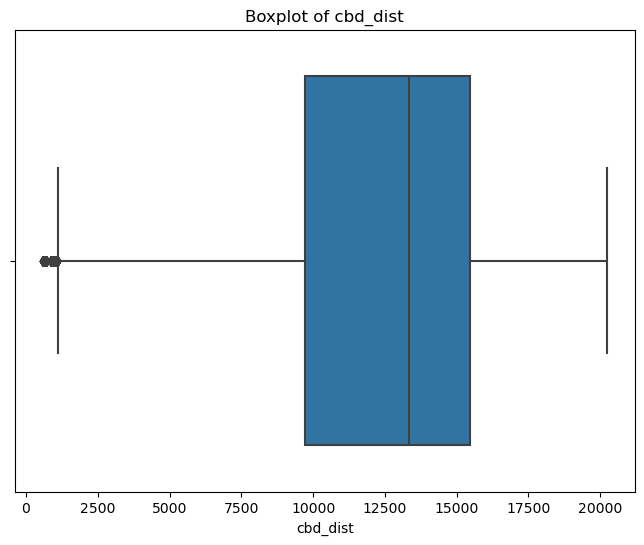

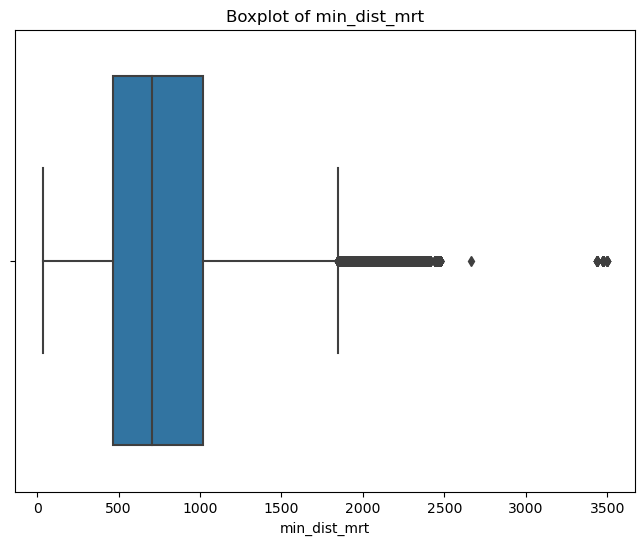

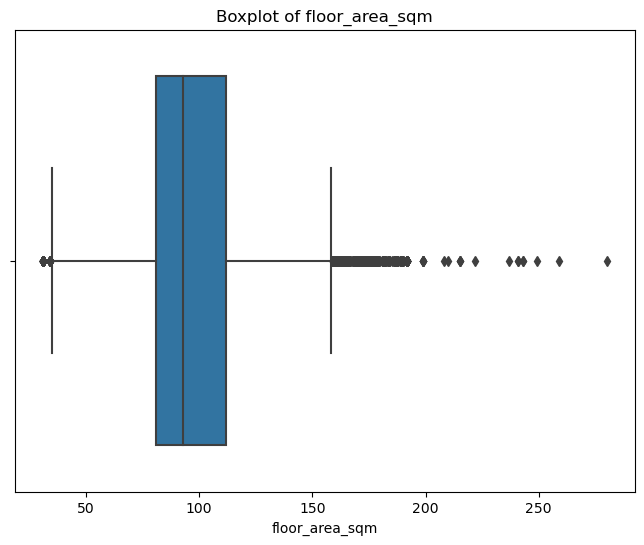

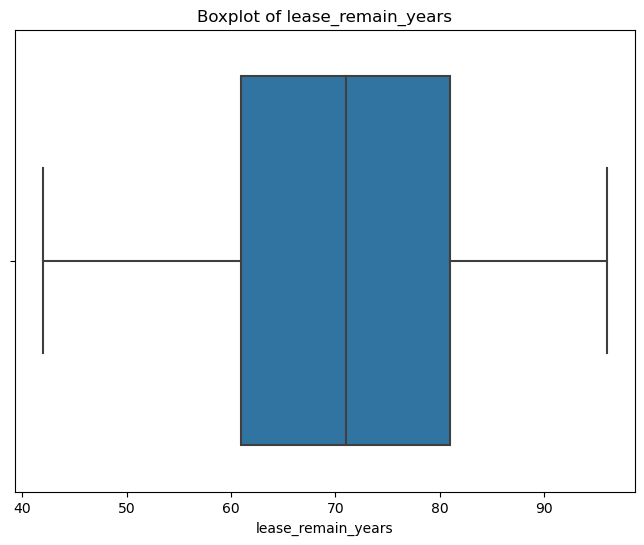

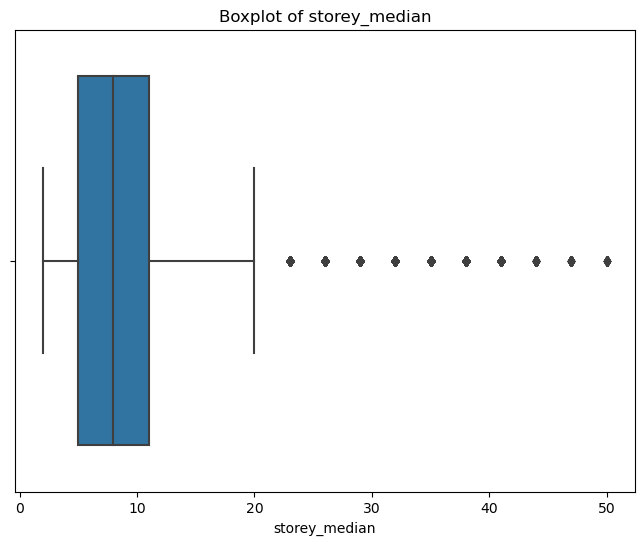

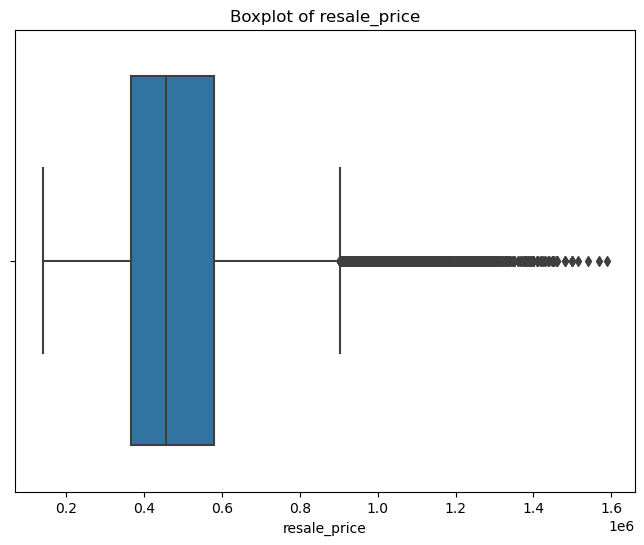

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns(continuous variables) for finding skewness
col = ['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']

for i in col:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

In [9]:
df1 = scope_df

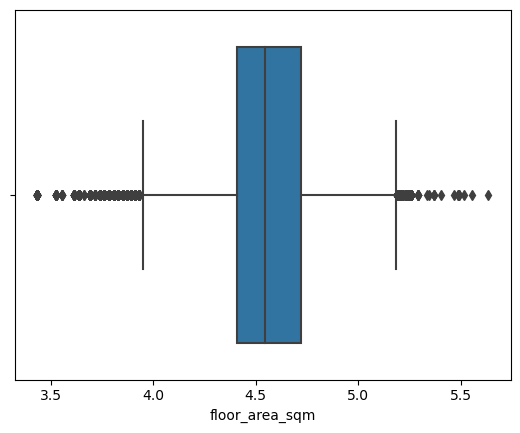

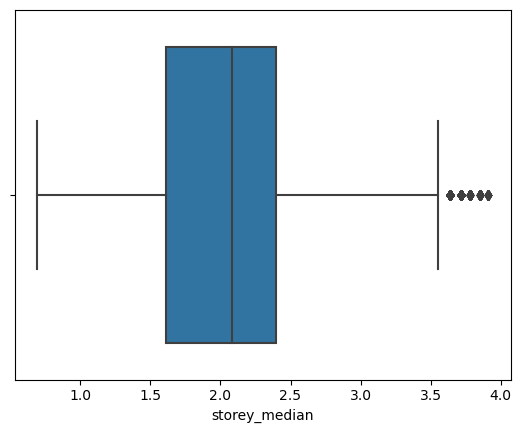

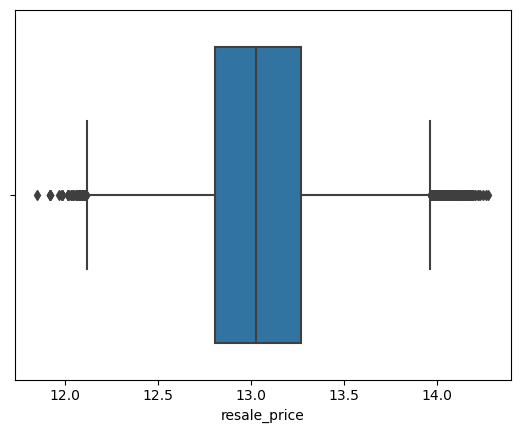

In [10]:
# Apply a logarithmic transformation to the required columns only.
# One need to apply it and check, in some cases it will handle the skewness, and in other cases it might not have a great 
                                                                # effect on the data, so no need to apply for that columns
    
df1['floor_area_sqm'] = np.log(df1['floor_area_sqm'])
sns.boxplot(x='floor_area_sqm', data=df1)
plt.show()

df1['storey_median'] = np.log(df1['storey_median'])
sns.boxplot(x='storey_median', data=df1)
plt.show()

df1['resale_price'] = np.log(df1['resale_price'])
sns.boxplot(x='resale_price', data=df1)
plt.show()

In [11]:
df1.dtypes

cbd_dist              float64
min_dist_mrt          float64
floor_area_sqm        float64
lease_remain_years      int64
storey_median         float64
resale_price          float64
dtype: object

# Visualization among different columns using Correlation Matrix

<Axes: title={'center': 'Correlation Heatmap'}>

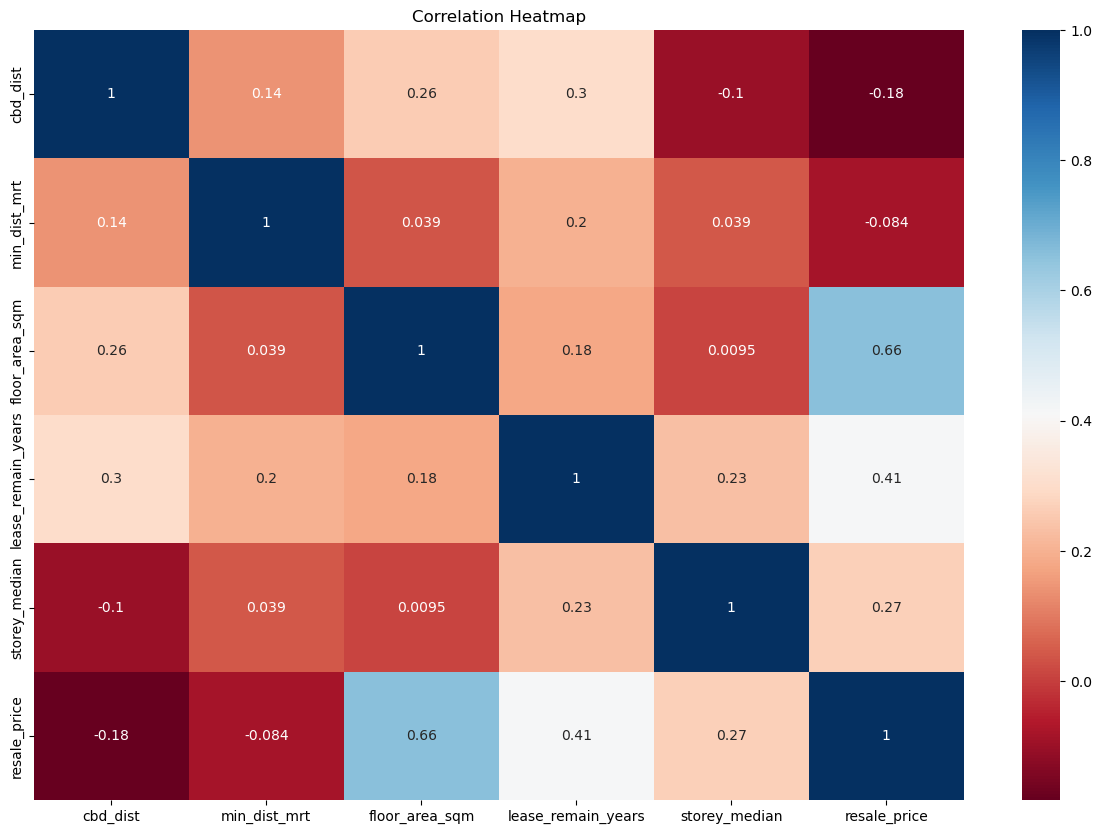

In [12]:
import seaborn as sns

corrMatrix = df1.corr()
plt.figure(figsize=(15, 10))
plt.title("Correlation Heatmap")
sns.heatmap(
    corrMatrix, 
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap='RdBu', 
    annot=True
)

# Encoding Data

In [13]:
from sklearn.preprocessing import StandardScaler

X=df1[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median']]
y=df1['resale_price']

# Normalizing the encoded data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
test_dataframe = pd.DataFrame(X)
test_dataframe

,0,1,2,3,4
0,-0.490326,0.709944,-1.765461,-0.674784,0.212239
1,-0.490326,0.709944,-1.765461,-0.674784,0.655569
2,-0.490326,0.709944,-1.220864,-0.674784,-0.442069
3,-0.490326,0.709944,-2.886444,-0.674784,0.212239
4,-0.490326,0.709944,-1.701053,-0.674784,-0.442069
...,...,...,...,...,...
211739,0.507918,1.017538,-2.634963,1.821646,1.261589
211740,0.287414,0.148136,-1.277750,1.821646,0.655569
211741,1.274399,-1.274622,-2.717000,1.821646,-0.442069
211742,0.492339,0.839025,-0.057756,1.821646,-0.442069


# Splitting the Data for Training and Testing Purposes

In [15]:
from sklearn.model_selection import train_test_split

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Decision Tree Regressor

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Decision Tree Regressor
dtr = DecisionTreeRegressor()

# hyperparameters
param_grid = {
    'max_depth': [2, 5, 10, 15, 20, 22],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(" ")
print('Mean squared error:', mse)
print('Mean Absolute Error', mae)
print('Root Mean squared error:', rmse)
print(" ")
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 4}
 
Mean squared error: 0.016559936163426124
Mean Absolute Error 0.10352465075894056
Root Mean squared error: 0.12868541550395726
 
R-squared: 0.850492180492929


# Testing Our Trained Model (Decision Tree Regressor)

In [17]:
new_sample = np.array([[8740, 999, np.log(44), 55, np.log(11)]])
new_sample = scaler.transform(new_sample[:, :5])
new_pred = best_model.predict(new_sample)[0]
np.exp(new_pred)

226564.00741450724

In [18]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)